In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("cirrhosis.csv")

In [ ]:
df1

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


In [ ]:
df2

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
df2.rename(columns={'ID': 'id'}, inplace=True)

In [ ]:
df = df1.append(df2)

<ipython-input-30-68017848d1f5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


In [ ]:
df

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,415,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,416,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,417,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.drop('id', axis=1, inplace=True)

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
414,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
415,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
416,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.reset_index(drop=True, inplace=True)


In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8318,681,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0,D
8319,1103,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0,C
8320,1055,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0,C
8321,691,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0,C


In [ ]:
df.columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status'],
      dtype='object')

In [ ]:
#Defining a selective outlier capping approach so as to not remove data which could indicate valuable insights during model training and not change the distribution too much
# Upper limits set based on the distribution of the scatter plots above(Only extereme values removed and capped)
# df_C = df[df['Status'] =='C']
# df_CL = df[df['Status'] =='CL']
# df_D = df[df['Status'] =='D']

# df['Bilirubin'].iloc[(df_CL[df_CL['Bilirubin'] > 8.7].index)] = 8.7
# df['Bilirubin'].iloc[(df_C[df_C['Bilirubin'] > 14.5].index)] = 14.5
# df['Bilirubin'].iloc[(df_D[df_D['Bilirubin'] > 14.6].index)] = 14.6

# df['Cholesterol'].iloc[(df_CL[df_CL['Cholesterol'] > 750].index)] = 750

# df['SGOT'].iloc[(df_C[df_C['SGOT'] > 328.6].index)] = 328.6
# df['SGOT'].iloc[(df_D[df_D['SGOT'] > 338].index)] = 338

# df['Tryglicerides'].iloc[(df_C[df_C['Tryglicerides'] > 432].index)] = 432
# df['Tryglicerides'].iloc[(df_D[df_D['Tryglicerides'] > 432].index)] = 432

# df['Platelets'].iloc[(df_D[df_D['Platelets'] > 600].index)] = 563

# df['Prothrombin'].iloc[(df_C[df_C['Prothrombin'] > 13.6].index)] = 13.6
# df['Prothrombin'].iloc[(df_D[df_D['Prothrombin'] > 14.1].index)] = 14.1

In [ ]:
df.isna().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

In [ ]:
df.dropna(axis=0, how='any', inplace=True)
df.isna().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [ ]:
df

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0,C
8213,994,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,C
8214,939,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,C
8215,839,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,C


In [ ]:
df_test = pd.read_csv("test.csv")
test_IDs = df_test.id
df_test = df_test.drop("id", axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
# drug_le = LabelEncoder().fit(df['Drug'])
# df['Drug'] = drug_le.transform(df['Drug'])
# df_test['Drug'] = drug_le.transform(df_test['Drug'])

# sex_le = LabelEncoder().fit(df['Sex'])
# df['Sex'] = sex_le.transform(df['Sex'])
# df_test['Sex'] = sex_le.transform(df_test['Sex'])

# ascites_le = LabelEncoder().fit(df['Ascites'])
# df['Ascites'] = ascites_le.transform(df['Ascites'])
# df_test['Ascites'] = ascites_le.transform(df_test['Ascites'])

# hepatomegaly_le = LabelEncoder().fit(df['Hepatomegaly'])
# df['Hepatomegaly'] = hepatomegaly_le.transform(df['Hepatomegaly'])
# df_test['Hepatomegaly'] = hepatomegaly_le.transform(df_test['Hepatomegaly'])

# spiders_le = LabelEncoder().fit(df['Spiders'])
# df['Spiders'] = spiders_le.transform(df['Spiders'])
# df_test['Spiders'] = spiders_le.transform(df_test['Spiders'])

# # Edema_le = LabelEncoder().fit(df['Edema'])
# # df['Edema'] = Edema_le.transform(df['Edema'])
# # df_test['Edema'] = Edema_le.transform(df_test['Edema'])

# df_edema_encoded =  pd.get_dummies(df['Edema'],prefix = 'Edema_Presence', columns =['Edema'])
# df = pd.concat([df, df_edema_encoded], axis=1)
# df = df.drop(['Edema'], axis=1)

# df_test_edema_encoded = pd.get_dummies(df_test['Edema'],prefix = 'Edema_Presence', columns =['Edema'])
# df_test = pd.concat([df_test, df_test_edema_encoded], axis=1)
# df_test = df_test.drop(['Edema'], axis=1)

# status_le = LabelEncoder().fit(df['Status'])
# df['Status'] = status_le.transform(df['Status'])

df_drug_encoded =  pd.get_dummies(df['Drug'],prefix = 'Drug_Presence', columns =['Drug'])
df = pd.concat([df, df_drug_encoded], axis=1)
df = df.drop(['Drug'], axis=1)

df_test_drug_encoded = pd.get_dummies(df_test['Drug'],prefix = 'Drug_Presence', columns =['Drug'])
df_test = pd.concat([df_test, df_test_drug_encoded], axis=1)
df_test = df_test.drop(['Drug'], axis=1)

df_sex_encoded =  pd.get_dummies(df['Sex'],prefix = 'Drug_Presence', columns =['Sex'])
df = pd.concat([df, df_sex_encoded], axis=1)
df = df.drop(['Sex'], axis=1)

df_test_sex_encoded = pd.get_dummies(df_test['Sex'],prefix = 'Drug_Presence', columns =['Sex'])
df_test = pd.concat([df_test, df_test_sex_encoded], axis=1)
df_test = df_test.drop(['Sex'], axis=1)

df_ascites_encoded =  pd.get_dummies(df['Ascites'],prefix = 'Ascites_Presence', columns =['Ascites'])
df = pd.concat([df, df_ascites_encoded], axis=1)
df = df.drop(['Ascites'], axis=1)

df_test_ascites_encoded = pd.get_dummies(df_test['Ascites'],prefix = 'Ascites_Presence', columns =['Ascites'])
df_test = pd.concat([df_test, df_test_ascites_encoded], axis=1)
df_test = df_test.drop(['Ascites'], axis=1)

df_hepatomegaly_encoded =  pd.get_dummies(df['Hepatomegaly'],prefix = 'Hepatomegaly_Presence', columns =['Hepatomegaly'])
df = pd.concat([df, df_hepatomegaly_encoded], axis=1)
df = df.drop(['Hepatomegaly'], axis=1)

df_test_hepatomegaly_encoded = pd.get_dummies(df_test['Hepatomegaly'],prefix = 'Hepatomegaly_Presence', columns =['Hepatomegaly'])
df_test = pd.concat([df_test, df_test_hepatomegaly_encoded], axis=1)
df_test = df_test.drop(['Hepatomegaly'], axis=1)


df_spiders_encoded =  pd.get_dummies(df['Spiders'],prefix = 'Spiders_Presence', columns =['Spiders'])
df = pd.concat([df, df_spiders_encoded], axis=1)
df = df.drop(['Spiders'], axis=1)

df_test_spiders_encoded = pd.get_dummies(df_test['Spiders'],prefix = 'Spiders_Presence', columns =['Spiders'])
df_test = pd.concat([df_test, df_test_spiders_encoded], axis=1)
df_test = df_test.drop(['Spiders'], axis=1)

df_edema_encoded =  pd.get_dummies(df['Edema'],prefix = 'Edema_Presence', columns =['Edema'])
df = pd.concat([df, df_edema_encoded], axis=1)
df = df.drop(['Edema'], axis=1)

df_test_edema_encoded = pd.get_dummies(df_test['Edema'],prefix = 'Edema_Presence', columns =['Edema'])
df_test = pd.concat([df_test, df_test_edema_encoded], axis=1)
df_test = df_test.drop(['Edema'], axis=1)

status_le = OrdinalEncoder().fit(df[['Status']])
df['Status'] = status_le.transform(df[['Status']])

In [ ]:
df

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Drug_Presence_M,Ascites_Presence_N,Ascites_Presence_Y,Hepatomegaly_Presence_N,Hepatomegaly_Presence_Y,Spiders_Presence_N,Spiders_Presence_Y,Edema_Presence_N,Edema_Presence_S,Edema_Presence_Y
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,...,1,1,0,1,0,1,0,1,0,0
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,...,0,1,0,1,0,1,0,1,0,0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,...,0,1,0,0,1,0,1,0,0,1
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,...,0,1,0,1,0,1,0,1,0,0
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,1153,22347,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,...,0,1,0,0,1,1,0,1,0,0
8213,994,21294,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,...,0,1,0,1,0,1,0,1,0,0
8214,939,22767,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,...,0,1,0,1,0,1,0,1,0,0
8215,839,13879,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
df['Status'].value_counts()

0.0    5112
2.0    2776
1.0     293
Name: Status, dtype: int64

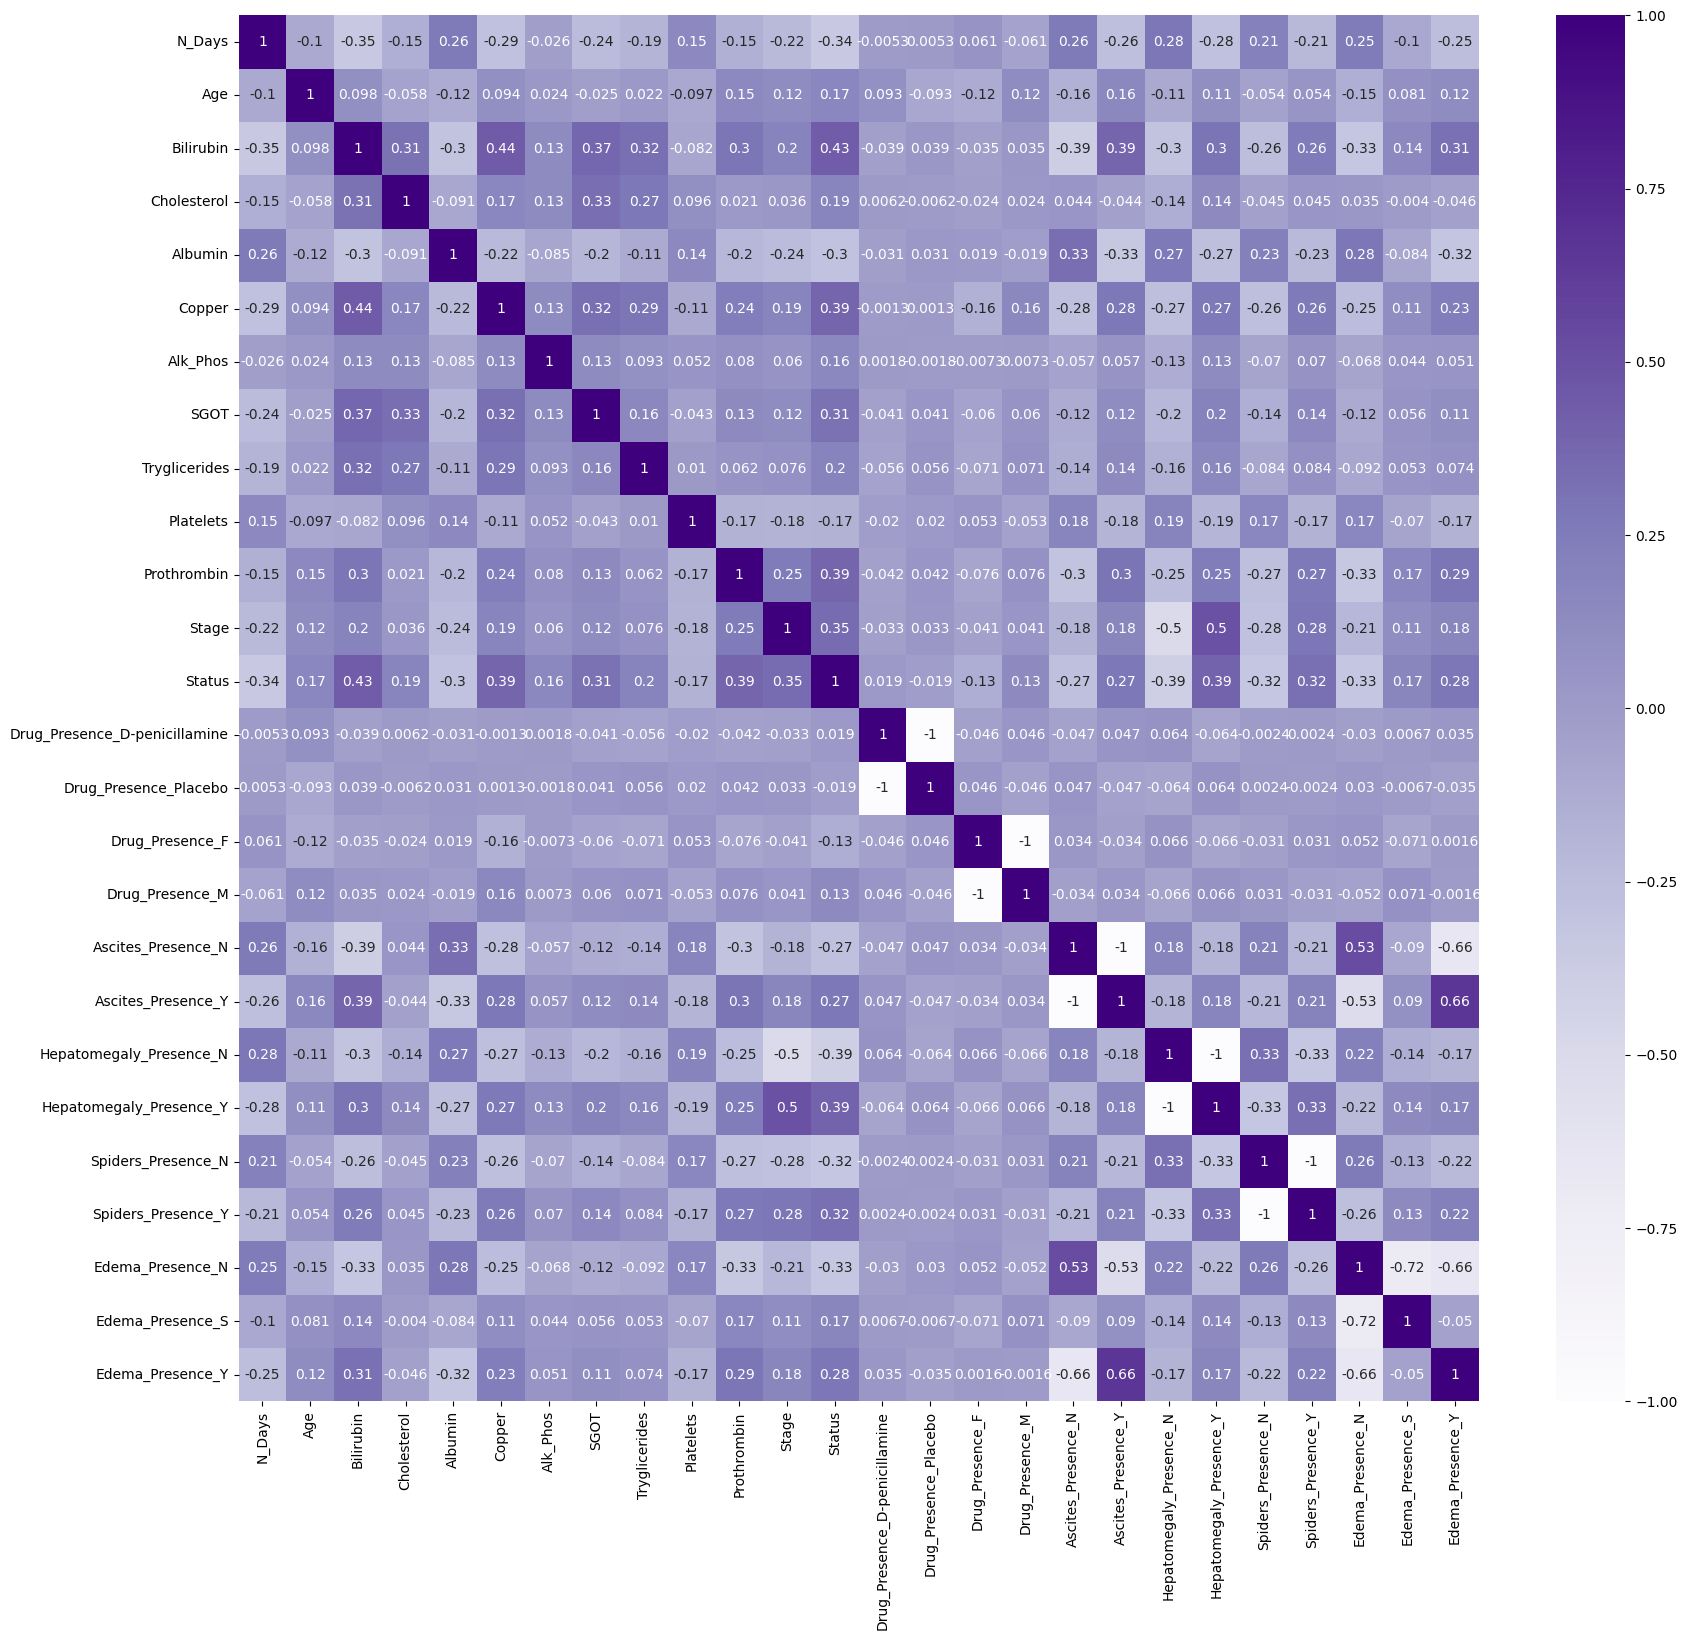

In [ ]:
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Purples)
plt.show()

In [ ]:
cor_target = abs(cor["Status"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

N_Days                     0.344967
Age                        0.170017
Bilirubin                  0.429771
Cholesterol                0.185468
Albumin                    0.295322
Copper                     0.386971
Alk_Phos                   0.159669
SGOT                       0.311983
Tryglicerides              0.199001
Platelets                  0.170280
Prothrombin                0.387464
Stage                      0.345782
Status                     1.000000
Drug_Presence_F            0.133535
Drug_Presence_M            0.133535
Ascites_Presence_N         0.274801
Ascites_Presence_Y         0.274801
Hepatomegaly_Presence_N    0.392685
Hepatomegaly_Presence_Y    0.392685
Spiders_Presence_N         0.321236
Spiders_Presence_Y         0.321236
Edema_Presence_N           0.326014
Edema_Presence_S           0.172007
Edema_Presence_Y           0.281768
Name: Status, dtype: float64

In [ ]:
df.columns

Index(['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status', 'Drug_Presence_D-penicillamine',
       'Drug_Presence_Placebo', 'Drug_Presence_F', 'Drug_Presence_M',
       'Ascites_Presence_N', 'Ascites_Presence_Y', 'Hepatomegaly_Presence_N',
       'Hepatomegaly_Presence_Y', 'Spiders_Presence_N', 'Spiders_Presence_Y',
       'Edema_Presence_N', 'Edema_Presence_S', 'Edema_Presence_Y'],
      dtype='object')

In [ ]:
# df_afterfe=df[['N_Days', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
#       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
#       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']]
df_afterfe=df

In [ ]:
X = df_afterfe.drop("Status", axis=1)
y = df_afterfe["Status"]
print(X.shape)
print(y.shape)

(8181, 25)
(8181,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print("Training set size: {}".format(X_train.shape))
print("Testing set size: {}".format(X_test.shape))

Training set size: (6544, 25)
Testing set size: (1637, 25)


In [ ]:
y_test.value_counts()

0.0    1019
2.0     561
1.0      57
Name: Status, dtype: int64

In [ ]:
X_train

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Drug_Presence_M,Ascites_Presence_N,Ascites_Presence_Y,Hepatomegaly_Presence_N,Hepatomegaly_Presence_Y,Spiders_Presence_N,Spiders_Presence_Y,Edema_Presence_N,Edema_Presence_S,Edema_Presence_Y
7386,400,21464,3.4,260.0,3.65,290.0,1257.0,102.30,118.0,143.0,...,1,0,1,0,1,0,1,0,0,1
1461,1420,12035,0.6,314.0,3.85,48.0,7277.0,79.05,224.0,258.0,...,0,1,0,1,0,1,0,1,0,0
2895,1234,11058,7.3,1276.0,3.77,247.0,2424.0,198.40,140.0,330.0,...,0,1,0,0,1,1,0,1,0,0
3784,1657,19270,5.0,1600.0,3.21,75.0,2656.0,82.15,174.0,181.0,...,0,1,0,0,1,0,1,1,0,0
8141,1882,21828,1.6,442.0,2.95,105.0,820.0,85.25,108.0,181.0,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4060,1321,18302,0.8,257.0,3.89,9.0,637.0,97.65,146.0,295.0,...,0,1,0,1,0,1,0,1,0,0
1346,3422,23107,14.5,448.0,3.06,34.0,1218.0,60.45,318.0,385.0,...,0,1,0,0,1,0,1,1,0,0
3454,1615,19155,0.7,303.0,3.35,42.0,2132.0,79.05,91.0,251.0,...,0,1,0,0,1,0,1,1,0,0
7533,2468,17233,1.4,201.0,3.94,44.0,1345.0,54.25,145.0,445.0,...,0,1,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# scaler = MinMaxScaler()
# X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.fit_transform(X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_train.sort_index()

# scaler = RobustScaler()
# X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.fit_transform(X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_train.sort_index()

# scaler = StandardScaler()
# X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.fit_transform(X_train[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(X_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']] = scaler.transform(df_test[['N_Days','Age','Bilirubin','Albumin','Copper','Alk_Phos','SGOT','Platelets','Prothrombin','Cholesterol','Tryglicerides']])
# X_train.sort_index()

min_max_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
X_train[['N_Days','Age',]] = min_max_scaler.fit_transform(X_train[['N_Days','Age']])
X_test[['N_Days','Age']] = min_max_scaler.transform(X_test[['N_Days','Age']])
df_test[['N_Days','Age']] = min_max_scaler.transform(df_test[['N_Days','Age']])

X_train[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']] = robust_scaler.fit_transform(X_train[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']])
X_test[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']] = robust_scaler.transform(X_test[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']])
df_test[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']] = robust_scaler.transform(df_test[['Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import make_scorer

scoring_metric = make_scorer(log_loss, needs_proba=True, greater_is_better=False)

score_log = pd.DataFrame()
def score(model, name , x_test, y_test, position):
    y_pred = model.predict(x_test)
    pred = model.predict_proba(x_test)
    y_pred = y_pred.reshape(-1,)
    compare_results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
    print("Confusion matrix: \n",confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(compare_results)
    score_log.loc[position, "Model"] = name
    score_log.loc[position, "Accuracy"] = round(accuracy_score(y_test, y_pred), 2)
    score_log.loc[position, "Precision"] = round(precision_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "Recall"] = round(recall_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "F1-Score"] = round(f1_score(y_test, y_pred, average='weighted'), 2)
    score_log.loc[position, "LogLoss"] = round(log_loss(y_test, pred), 5)
    return score_log

In [ ]:
submission_labels = ["Status_C", "Status_CL", "Status_D"]
def submission_file(model):
  sub = pd.DataFrame()
  submission_predictions = (model.predict_proba(df_test))
  # print(submission_predictions)
  sub = pd.DataFrame({"id": test_IDs, **dict(zip(submission_labels, submission_predictions.T))})
  return sub

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier(n_neighbors = 5, p = 3, metric='minkowski',)
KNN_Classifier.fit(X_train, y_train)
print(score(KNN_Classifier,"KNN Classifier", X_test, y_test, 1))

Confusion matrix: 
 [[916   3 100]
 [ 39   6  12]
 [198   4 359]]
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1019
         1.0       0.46      0.11      0.17        57
         2.0       0.76      0.64      0.70       561

    accuracy                           0.78      1637
   macro avg       0.67      0.55      0.57      1637
weighted avg       0.77      0.78      0.77      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        2.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        0.0
1316     2.0        0.0
822      0.0        0.0

[1637 rows x 2 columns]
            Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1  KNN Classifier      0.78       0.77    0.78      0.77  2.52667


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
print(score(model,"Gaussian Naive Bayes", X_test, y_test, 2))

Confusion matrix: 
 [[914  46  59]
 [ 46   5   6]
 [250  60 251]]
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1019
         1.0       0.05      0.09      0.06        57
         2.0       0.79      0.45      0.57       561

    accuracy                           0.71      1637
   macro avg       0.53      0.48      0.48      1637
weighted avg       0.74      0.71      0.71      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        1.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        2.0
2479     2.0        2.0
1316     2.0        1.0
822      0.0        2.0

[1637 rows x 2 columns]
                  Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1        KNN Classifier      0.78       0.77    0.78      0.77  2.52667
2  Gaussian Naive Bayes      0.71       0.74    0.71      0.71  2.72311


In [ ]:
from sklearn.naive_bayes import BernoulliNB
model_bernoulli=BernoulliNB()
model_bernoulli.fit(X_train,y_train)
print(score(model_bernoulli,"Bernoulli Naive Bayes", X_test, y_test, 3))

Confusion matrix: 
 [[855   5 159]
 [ 30   1  26]
 [135   3 423]]
              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84      1019
         1.0       0.11      0.02      0.03        57
         2.0       0.70      0.75      0.72       561

    accuracy                           0.78      1637
   macro avg       0.55      0.54      0.53      1637
weighted avg       0.76      0.78      0.77      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        2.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        2.0
1316     2.0        0.0
822      0.0        2.0

[1637 rows x 2 columns]
                   Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1         KNN Classifier      0.78       0.77    0.78      0.77  2.52667
2   Gaussian Naive Bayes      0.71       0.74    0.71      0.71  2.72311
3  Bernoulli Naive Ba

In [ ]:
from sklearn.svm import SVC
model=SVC(probability = True)
model.fit(X_train,y_train)
print(score(model,"SVC", X_test, y_test, 4))

Confusion matrix: 
 [[928   0  91]
 [ 37   1  19]
 [173   0 388]]
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1019
         1.0       1.00      0.02      0.03        57
         2.0       0.78      0.69      0.73       561

    accuracy                           0.80      1637
   macro avg       0.86      0.54      0.54      1637
weighted avg       0.81      0.80      0.79      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        0.0
1316     2.0        0.0
822      0.0        2.0

[1637 rows x 2 columns]
                   Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1         KNN Classifier      0.78       0.77    0.78      0.77  2.52667
2   Gaussian Naive Bayes      0.71       0.74    0.71      0.71  2.72311
3  Bernoulli Naive Ba

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters = {'kernel':('linear','poly','rbf'), 'C':[1, 10]}
svc = svm.SVC(probability = True)
svc_grid_cv = GridSearchCV(svc,parameters,scoring = scoring_metric)
svc_grid_cv.fit(X_train,y_train)
print(score(svc_grid_cv,"Grid Search SVC", X_test, y_test, 5))

Confusion matrix: 
 [[928   0  91]
 [ 37   1  19]
 [173   0 388]]
              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1019
         1.0       1.00      0.02      0.03        57
         2.0       0.78      0.69      0.73       561

    accuracy                           0.80      1637
   macro avg       0.86      0.54      0.54      1637
weighted avg       0.81      0.80      0.79      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        0.0
1316     2.0        0.0
822      0.0        2.0

[1637 rows x 2 columns]
                   Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1         KNN Classifier      0.78       0.77    0.78      0.77  2.52667
2   Gaussian Naive Bayes      0.71       0.74    0.71      0.71  2.72311
3  Bernoulli Naive Ba

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', max_depth= 12, max_features= 'sqrt', random_state = 0)
classifier.fit(X_train, y_train)
print(score(classifier,"Random Forest Classifier", X_test, y_test, 6))

Confusion matrix: 
 [[938   0  81]
 [ 30   7  20]
 [164   2 395]]
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1019
         1.0       0.78      0.12      0.21        57
         2.0       0.80      0.70      0.75       561

    accuracy                           0.82      1637
   macro avg       0.80      0.58      0.61      1637
weighted avg       0.82      0.82      0.81      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        0.0
1316     2.0        2.0
822      0.0        0.0

[1637 rows x 2 columns]
                      Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1            KNN Classifier      0.78       0.77    0.78      0.77  2.52667
2      Gaussian Naive Bayes      0.71       0.74    0.71      0.71  2.72311
3     Bernou

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
print(score(logmodel,"Logistic Regression", X_test, y_test, 7))

Confusion matrix: 
 [[917   0 102]
 [ 42   0  15]
 [177   0 384]]
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      1019
         1.0       0.00      0.00      0.00        57
         2.0       0.77      0.68      0.72       561

    accuracy                           0.79      1637
   macro avg       0.52      0.53      0.52      1637
weighted avg       0.77      0.79      0.78      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        2.0
1316     2.0        0.0
822      0.0        2.0

[1637 rows x 2 columns]
                      Model  Accuracy  Precision  Recall  F1-Score  LogLoss
1            KNN Classifier      0.78       0.77    0.78      0.77  2.52667
2      Gaussian Naive Bayes      0.71       0.74    0.71      0.71  2.72311
3     Bernou

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
parameters = {'max_features':(["sqrt"]), 'criterion':("gini", "entropy", "log_loss"),  'max_depth':[10, 12, 15, 17, 20], }
rfc_grid = RandomForestClassifier(random_state = 0)
rf_grid_cv = GridSearchCV(rfc_grid,parameters,scoring = scoring_metric)
rf_grid_cv.fit(X_train,y_train)
print(rf_grid_cv.best_params_)
print(score(rf_grid_cv,"Grid Search Random Forest Classfier", X_test, y_test, 8))

{'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt'}
Confusion matrix: 
 [[945   0  74]
 [ 33   6  18]
 [143   3 415]]
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      1019
         1.0       0.67      0.11      0.18        57
         2.0       0.82      0.74      0.78       561

    accuracy                           0.83      1637
   macro avg       0.78      0.59      0.61      1637
weighted avg       0.83      0.83      0.82      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        0.0
1316     2.0        2.0
822      0.0        0.0

[1637 rows x 2 columns]
                                 Model  Accuracy  Precision  Recall  F1-Score  \
1                       KNN Classifier      0.78       0.77    0.78      0.77   
2              

Confusion matrix: 
 [[924   2  93]
 [ 29  11  17]
 [134   7 420]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1019
         1.0       0.55      0.19      0.29        57
         2.0       0.79      0.75      0.77       561

    accuracy                           0.83      1637
   macro avg       0.73      0.62      0.64      1637
weighted avg       0.82      0.83      0.82      1637

      Actual  Predicted
3662     2.0          2
8168     1.0          2
3927     0.0          0
7071     0.0          0
1929     0.0          0
...      ...        ...
498      0.0          0
2607     0.0          0
2479     2.0          0
1316     2.0          2
822      0.0          2

[1637 rows x 2 columns]
                                 Model  Accuracy  Precision  Recall  F1-Score  \
1                       KNN Classifier      0.78       0.77    0.78      0.77   
2                 Gaussian Naive Bayes      0.71       0.74    0.71      0.71 

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

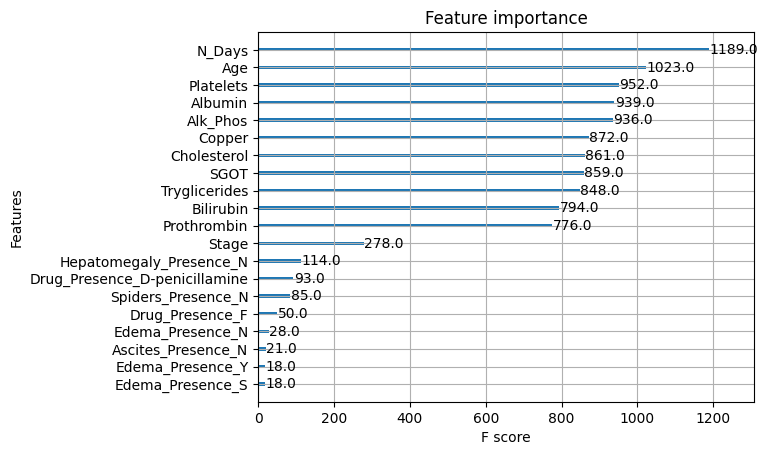

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print(score(xgb,"XGBoost Classfier", X_test, y_test, 9))
from xgboost import plot_importance
plot_importance(xgb)

In [ ]:
# parameters = {'n_estimators': [2,4,6,8,10], 'max_depth':[3,4,5,6,7,8,9,10], 'min_child_weight':[3,4,5,6,7,8,9,10]}
# xgb_grid = XGBClassifier()
# xgb_grid_cv = GridSearchCV(xgb_grid,parameters,scoring = scoring_metric)
# xgb_grid_cv.fit(X_train,y_train)
# print(xgb_grid_cv.best_params_)
# print(score(xgb_grid_cv,"Grid Search XGBoost Classfier", X_test, y_test, 10))
from hyperopt import hp,tpe, fmin,Trials, STATUS_OK
from sklearn.model_selection import StratifiedKFold,cross_val_score
def objective_function(params):
    xgb_clf = XGBClassifier(**params)
    score = cross_val_score(xgb_clf, X_train, y_train, cv=StratifiedKFold(n_splits=5, shuffle=True),scoring = scoring_metric,n_jobs = -1,error_score = 'raise').mean()
    print(score)
    # return {'loss': -score , 'status': STATUS_OK}

max_depth_space_choices = np.arange(1, 16, dtype=int)
n_estimators_space_choices = np.arange(150, 401, dtype=int)
space= {
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.2),
    'max_depth': hp.choice('max_depth', max_depth_space_choices),
    'n_estimators': hp.choice('n_estimators', n_estimators_space_choices),
    'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'gamma': hp.uniform ('gamma', 0,9),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
}

tpe_algorithm = tpe.suggest
#Define the maximum number of iterations to take
num_eval = 500
trials = Trials()
best_param = fmin(objective_function, space, algo=tpe.suggest, max_evals=num_eval, trials=trials)

xgb_hpt_optimized = XGBClassifier(**best_param)
xgb_hpt_optimized.fit(X_train,y_train)
print(score(xgb_hpt_optimized,"Grid Search XGBoost Classfier", X_test, y_test, 10))
# xgb_metrics_dict = xgb_hpt_optimized_metrics.iloc[0].to_dict()
# xgb_metrics_dict.pop('Model')
# xgb_metrics_dict





-0.45404759851073206
-0.4537261729180342
-0.44724816160927566
-0.4542840711475999
-0.45088892684739496
-0.45896711634517195
-0.46975040116444633
-0.4649821830900985
-0.44254600784476816
-0.4664864270537258
-0.44181065536860037
-0.4463030041110379
-0.44545994474552336
-0.46855031129986785
-0.4652032785420951
-0.46016388397592
-0.4396358378107886
-0.4496762376793611
-0.4672272676585177
-0.4713635595776626
-0.44083099078153076
-0.5181158735724287
-0.6020839818651013
-0.4444458869937152
-0.43427797074696883
-0.44227220050364835
-0.504666065365744
-0.4399565847212621
-0.44543967100197984
-0.44372694555813685
-0.4896113906446276
-0.4540302997907967
-0.4484285788659131
-0.4773168539429986
-0.4419040312581153
-0.4789855640141753
-0.45382337865757794
-0.45074860676303696
-0.4629575231005213
-0.44604580817441136
-0.44509354327760897
-0.44924292262277554
-0.45643678624823575
-0.4709763190505253
-0.444955384167781
-0.4684856405834396
-0.450583732926851
-0.4493301494627936
-0.459680656607255
-0.472

NameError: ignored

In [ ]:
# print(score(xgb_hpt_optimized,"Grid Search XGBoost Classfier", X_test, y_test, 10))

Confusion matrix: 
 [[927   2  90]
 [ 33   9  15]
 [135   5 421]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1019
         1.0       0.56      0.16      0.25        57
         2.0       0.80      0.75      0.77       561

    accuracy                           0.83      1637
   macro avg       0.74      0.61      0.63      1637
weighted avg       0.82      0.83      0.82      1637

      Actual  Predicted
3662     2.0          2
8168     1.0          2
3927     0.0          0
7071     0.0          0
1929     0.0          0
...      ...        ...
498      0.0          0
2607     0.0          0
2479     2.0          0
1316     2.0          2
822      0.0          0

[1637 rows x 2 columns]
                                  Model  Accuracy  Precision  Recall  \
1                        KNN Classifier      0.78       0.77    0.78   
2                  Gaussian Naive Bayes      0.71       0.74    0.71   
3                 Bernou

In [ ]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=100,
                                    depth=6,
                                    learning_rate=0.5,
                                    loss_function='MultiClass',
                                    random_state=42,
                                    verbose=100)
catboost_model.fit(X_train,y_train)
print(score(catboost_model,"Catboost Classfier", X_test, y_test, 11))

0:	learn: 0.7089368	total: 61.9ms	remaining: 6.13s
99:	learn: 0.2457671	total: 997ms	remaining: 0us
Confusion matrix: 
 [[925   1  93]
 [ 31  11  15]
 [138   5 418]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1019
         1.0       0.65      0.19      0.30        57
         2.0       0.79      0.75      0.77       561

    accuracy                           0.83      1637
   macro avg       0.76      0.62      0.65      1637
weighted avg       0.82      0.83      0.82      1637

      Actual  Predicted
3662     2.0        2.0
8168     1.0        2.0
3927     0.0        0.0
7071     0.0        0.0
1929     0.0        0.0
...      ...        ...
498      0.0        0.0
2607     0.0        0.0
2479     2.0        0.0
1316     2.0        2.0
822      0.0        0.0

[1637 rows x 2 columns]
                                  Model  Accuracy  Precision  Recall  \
1                        KNN Classifier      0.78       0.77    0.78

In [ ]:
catboost_model_default = CatBoostClassifier()
catboost_model_default.fit(X_train,y_train)
print(score(catboost_model_default,"Catboost Classfier Default", X_test, y_test, 12))

Learning rate set to 0.087083
0:	learn: 1.0114616	total: 13.1ms	remaining: 13.1s
1:	learn: 0.9435037	total: 22.5ms	remaining: 11.2s
2:	learn: 0.8859471	total: 32ms	remaining: 10.6s
3:	learn: 0.8356880	total: 41.4ms	remaining: 10.3s
4:	learn: 0.7936993	total: 50.8ms	remaining: 10.1s
5:	learn: 0.7583653	total: 60.6ms	remaining: 10s
6:	learn: 0.7288304	total: 70.1ms	remaining: 9.94s
7:	learn: 0.7024193	total: 80ms	remaining: 9.93s
8:	learn: 0.6817145	total: 83.9ms	remaining: 9.24s
9:	learn: 0.6604100	total: 93.5ms	remaining: 9.25s
10:	learn: 0.6412793	total: 105ms	remaining: 9.45s
11:	learn: 0.6249874	total: 130ms	remaining: 10.7s
12:	learn: 0.6103238	total: 140ms	remaining: 10.6s
13:	learn: 0.5966971	total: 150ms	remaining: 10.6s
14:	learn: 0.5840141	total: 159ms	remaining: 10.5s
15:	learn: 0.5729235	total: 169ms	remaining: 10.4s
16:	learn: 0.5635087	total: 178ms	remaining: 10.3s
17:	learn: 0.5540951	total: 188ms	remaining: 10.2s
18:	learn: 0.5463220	total: 202ms	remaining: 10.4s
19:	lea

In [ ]:
parameters = {'max_depth': [4],'iterations':[100,150,200], 'learning_rate' :[0.6,0.65,0.7]}
catboost_grid = CatBoostClassifier(loss_function='MultiClass',
                                    random_state=42,
                                    verbose=100)
catboost_grid_cv = GridSearchCV(catboost_grid,parameters,scoring = scoring_metric)
catboost_grid_cv.fit(X_train,y_train)
print(catboost_grid_cv.best_params_)
print(score(catboost_grid_cv,"Grid Search Catboost Classfier", X_test, y_test, 13))

0:	learn: 0.6674811	total: 4.96ms	remaining: 491ms
99:	learn: 0.3066198	total: 398ms	remaining: 0us
0:	learn: 0.6678884	total: 4.31ms	remaining: 427ms
99:	learn: 0.3118748	total: 418ms	remaining: 0us
0:	learn: 0.6844860	total: 4.73ms	remaining: 468ms
99:	learn: 0.3149195	total: 408ms	remaining: 0us
0:	learn: 0.6887992	total: 4.49ms	remaining: 444ms
99:	learn: 0.3139387	total: 415ms	remaining: 0us
0:	learn: 0.6870731	total: 4.34ms	remaining: 430ms
99:	learn: 0.3184990	total: 415ms	remaining: 0us
0:	learn: 0.6487554	total: 4.43ms	remaining: 438ms
99:	learn: 0.3004260	total: 393ms	remaining: 0us
0:	learn: 0.6492048	total: 4.13ms	remaining: 408ms
99:	learn: 0.3058786	total: 397ms	remaining: 0us
0:	learn: 0.6665374	total: 4.56ms	remaining: 452ms
99:	learn: 0.3102000	total: 405ms	remaining: 0us
0:	learn: 0.6710550	total: 4.31ms	remaining: 427ms
99:	learn: 0.3073128	total: 419ms	remaining: 0us
0:	learn: 0.6692598	total: 4.41ms	remaining: 437ms
99:	learn: 0.3045616	total: 408ms	remaining: 0us


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(20),verbose=10,
                    learning_rate_init=0.5, max_iter=5000,
                    activation='logistic', solver='sgd', shuffle=True, random_state=30)

mlpc.fit(X_train,y_train)
print(score(mlpc,"Multilayer Perceptron Classfier", X_test, y_test, 14))

Iteration 1, loss = 0.61175818
Iteration 2, loss = 0.53428872
Iteration 3, loss = 0.52485466
Iteration 4, loss = 0.52023855
Iteration 5, loss = 0.51762644
Iteration 6, loss = 0.51272326
Iteration 7, loss = 0.50987221
Iteration 8, loss = 0.50774549
Iteration 9, loss = 0.50734453
Iteration 10, loss = 0.50404462
Iteration 11, loss = 0.50221646
Iteration 12, loss = 0.50013031
Iteration 13, loss = 0.49876934
Iteration 14, loss = 0.49839061
Iteration 15, loss = 0.49588970
Iteration 16, loss = 0.49544462
Iteration 17, loss = 0.49233937
Iteration 18, loss = 0.49091054
Iteration 19, loss = 0.49036092
Iteration 20, loss = 0.48625917
Iteration 21, loss = 0.48520481
Iteration 22, loss = 0.48275789
Iteration 23, loss = 0.48334276
Iteration 24, loss = 0.48310918
Iteration 25, loss = 0.48006887
Iteration 26, loss = 0.47979831
Iteration 27, loss = 0.47765881
Iteration 28, loss = 0.47934399
Iteration 29, loss = 0.47710908
Iteration 30, loss = 0.47746835
Iteration 31, loss = 0.47483936
Iteration 32, los

In [ ]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbmc.fit(X_train,y_train)
print(score(lgbmc,"LGBM Classfier", X_test, y_test, 15))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1931
[LightGBM] [Info] Number of data points in the train set: 6544, number of used features: 25
[LightGBM] [Info] Start training from score -0.469270
[LightGBM] [Info] Start training from score -3.322472
[LightGBM] [Info] Start training from score -1.083296
Confusion matrix: 
 [[922   2  95]
 [ 28  13  16]
 [141   7 413]]
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1019
         1.0       0.59      0.23      0.33        57
         2.0       0.79      0.74      0.76       561

    accuracy                           0.82      1637
   macro avg       0.74      0.62      0.65      1637
weighted avg       0.82      0.82      0.82      1637

      Actual  Predicted
3662     2.0   

In [ ]:
score_log

,Model,Accuracy,Precision,Recall,F1-Score,LogLoss
1,KNN Classifier,0.78,0.77,0.78,0.77,2.52667
2,Gaussian Naive Bayes,0.71,0.74,0.71,0.71,2.72311
3,Bernoulli Naive Bayes,0.78,0.76,0.78,0.77,0.82589
4,SVC,0.80,0.81,0.80,0.79,0.51621
5,Grid Search SVC,0.80,0.81,0.80,0.79,0.51640
6,Random Forest Classifier,0.82,0.82,0.82,0.81,0.56193
7,Logistic Regression,0.79,0.77,0.79,0.78,0.52988
8,Grid Search Random Forest Classfier,0.83,0.83,0.83,0.82,0.46059
9,XGBoost Classfier,0.83,0.82,0.83,0.82,0.50751
10,Grid Search XGBoost Classfier,0.83,0.82,0.83,0.82,0.44684


In [ ]:
# rf_grid_cv_sub_df = submission_file(rf_grid_cv) #grid search RF
# catboost_model_default_sub_df = submission_file(catboost_model_default) #Catboost with default parameter
# catboost_model_sub_df = submission_file(catboost_model) #Catboost regular - best submission so far
# catboost_grid_cv_sub_df = submission_file(catboost_grid_cv) #grid search Catboost
# xgb_grid_cv_sub_df = submission_file(xgb_grid_cv) #grid search XGBoost
# mlpc_sub_df = submission_file(mlpc) #Multilayer Perceptron

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
              ('lgbm',lgbmc)
              ,('rfgc',rf_grid_cv)
              ,('xggc',xgb_hpt_optimized)
              # ,('cbdm',catboost_model_default)
              # ,('cbgc',catboost_grid_cv)
              # ,('knn',KNN_Classifier)
              # ,('bnb',model_bernoulli)
              # ,('xg',xgb)
              # ,('svcgc',svc_grid_cv)
              # ,('rf',classifier)
              ]
stacked_classifier = StackingClassifier(estimators=estimators, final_estimator=mlpc)
stacked_classifier.fit(X_train,y_train)
print(score(stacked_classifier,"Stacked Classfier with RF/XGBoost/Catboost", X_test, y_test, 16))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1931
[LightGBM] [Info] Number of data points in the train set: 6544, number of used features: 25
[LightGBM] [Info] Start training from score -0.469270
[LightGBM] [Info] Start training from score -3.322472
[LightGBM] [Info] Start training from score -1.083296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1929
[LightGBM] [Info] Number of data points in the train set: 5235, number of used features: 25
[LightGBM] [Info] Start training from score -0.469354
[LightGBM] [Info] Start training from score -3.321375
[LightGBM] [Info] Start tr

In [ ]:
full_training_data = pd.concat([X_train,X_test])
full_test_data = pd.concat([y_train,y_test])
xgb_hpt_optimized.fit(full_training_data,full_test_data)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1.9077183824357862, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05030861137307444,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=244, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
submission_file(xgb_hpt_optimized).to_csv('submission.csv', index=False)

In [ ]:
#0.45195 rfgc/xggc/cbdm
#0.45313 rfgc/xggc/cbdm
#0.44992 all models